# HW7 due 11:30a Mon Nov 28

# Stability of discretization schemes
Consider the (CL) model
$$\dot{x} = Ax$$
and the (DL) model of the form
$$\bar{x}^+ = \bar{A}\bar{x}$$
that results from discretizing (CL) using the Forward Euler, Backward Euler, or Exact discretization scheme with step size $\delta > 0$.

Let $A = \left[\begin{array}{cc} 0 & 1 \\ -1 & 0 \end{array}\right]$; note that this is the matrix obtained by linearizing the pendulum model around the downward-pointing equilibrium.

a. Determine whether the (CL) system $\dot{x} = Ax$ is stable, unstable, or neutral.

b. Determine whether the (DL) system $\bar{x}^+ = \bar{A}\bar{x}$ is stable, unstable, or neutral, where $\bar{A}$ is obtained with $\delta = \frac{1}{2}$ via:

(i) Forward Euler:  $\bar{x}^+ = \bar{x} + \delta A \bar{x}$;

(ii) Backward Euler:  $\bar{x}^+ = \bar{x} + \delta A \bar{x}^+$;

(iii) Exact discretization:  $\bar{x}^+ = e^{A\delta} \bar{x}$.

# Asteroids linear system

This problem deals with the asteroids system nonlinear DE (N)
$$\dot{x} = f(x,u)$$
with equilibrium
$$ f(x_0,u_0) = 0$$
and associated linear DE (L)
$$\dot{\xi} = A\xi + B\mu$$
obtained with $A = D_x f(x_0,u_0)$, $B = D_u f(x_0,u_0)$.

a. Simulate two "interesting" nonequilibrium trajectories for (L); you may wish to apply nonzero inputs.  Show that the trajectories sum linearly, i.e. with $\xi_1,\xi_2:[0,t]\rightarrow\mathbb{R}^n$ denoting the two trajectories generated by inputs $\mu_1,\mu_2:[0,t]\rightarrow\mathbb{R}^m$, provide a plot that convinces the reader that the trajectory $\xi_1 + \xi_2$ is the same as that obtained by simulating from initial condition $\xi_1(0) + \xi_2(0)$ with input $\mu_1 + \mu_2$.

Recall that we have an equilibrium at 
$$v_1 = v_2 = 0$$
and
$$u_1 = u_2 = 0$$
For this, $x_1, x_2$ and $\theta$ can be arbitrary. Let's choose $x_1 = 2, x_2 = 3, \theta = \frac{\pi}{2}$

Our equilibrium is thus

$$x_0 = \begin{bmatrix}
 2\\3\\0\\0\\\frac{\pi}{2}
\end{bmatrix},~~~u_0 = \begin{bmatrix}
 0\\0\\
\end{bmatrix}$$

And we know that linearizing our system and evaluating at $x_0, u_0$ yields:

$$D_xf(x_0,u_0) = \begin{bmatrix}
0&0&1&0&0\\
0&0&0&1&0\\
0&0&-k&0&0\\
0&0&0&-k&0\\
0&0&0&0&0\\
\end{bmatrix}, D_uf(x_0,u_0) = \begin{bmatrix}
0&0\\
0&0\\
0&0\\
1&0\\
0&1\\
\end{bmatrix}$$

Now consider two different initial conditions

$$X_1 = \begin{bmatrix}
 0\\0\\4\\0\\\frac{\pi}{2}
\end{bmatrix}, X_2 = \begin{bmatrix}
 20\\0\\0\\3\\\frac{3\pi}{4}
\end{bmatrix}$$

Further, let 

$$\mu_1 = \begin{bmatrix}
 0.5\\\frac{\pi}{10}
\end{bmatrix}, \mu_2 = \begin{bmatrix}
 1\\\frac{\pi}{2}
\end{bmatrix}$$

Consider the summation of our two initial conditions as well


$$X_3 = X_1+X_2 = \begin{bmatrix}
 20\\0\\4\\3\\\frac{5\pi}{4}
\end{bmatrix}$$

$$\mu_3 = \mu_1 +\mu_2 =   \begin{bmatrix}
 1.5\\\frac{3\pi}{5}
\end{bmatrix}$$

And now let's observe their position trajectories for 30 seconds.

In [1]:
%run _547
%matplotlib inline

Let's set up the simulation parameters.

In [2]:
k = 0.1 #arbitrarily selected drag

#initial conditions
x1 = np.array([[0], [0], [4], [0], [np.pi/2]])
x2 = np.array([[20], [0], [0] ,[3], [np.pi*0.75]])
x3 = x1+x2

#constant inputs
u_1 = np.array([[0.5], [np.pi/10]])
u_2 = np.array([[1], [np.pi/2]])
u_3 = u_1+u_2

# simulation run time
t = 30

def f(t, x, u):
    A = np.array([[0,0,1,0,0], [0,0,0,1,0], [0,0,-k,0,0], [0,0,0,-k,0], [0,0,0,0,0]])
    B = np.array([[0,0], [0,0], [0,0], [1,0], [0,1]])
    return (np.dot(A,x)+np.dot(B,u))
def h(x):
    C = np.array([[1,0,0,0,0][0,1,0,0,0][0,0,0,0,1]])
    return np.dot(C,x)

And now define the simulation algorithm

In [3]:
def sim(f,t,x,u,dt=1e-4):
    j,t_,x_ = 0,[0],[x]
    while j*dt < t:
        t_.append((j+1)*dt)
        x_.append(x_[-1] + dt*f(j*dt,x_[-1],u))
        j += 1
    return np.array(t_),np.array(x_)

Let's run it for our initial conditions.

In [4]:
x = x1
t_,x_1 = sim(f,t,x, u_1, dt =1e-4)
x = x2
t_2,x_2 = sim(f,t,x, u_2, dt =1e-4)
x = x3
t_3,x_3 = sim(f,t,x, u_3, dt =1e-4)

Now consider the position trajectories over 30 seconds and their sum

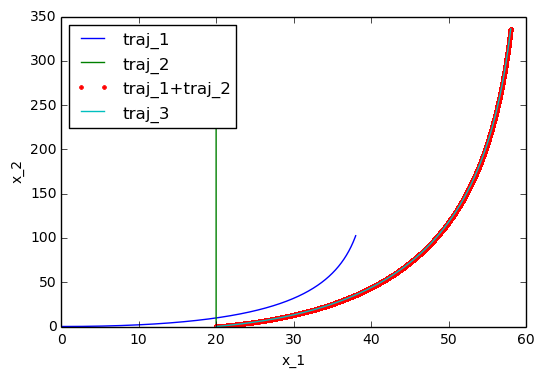

In [52]:
plt.plot(x_1[:,0], x_1[:,1], label='traj_1')
plt.plot(x_2[:,0], x_2[:,1], label='traj_2')
plt.plot(x_2[:,0]+x_1[:,0], x_2[:,1]+x_1[:,1], '.', label='traj_1+traj_2')
plt.plot(x_3[:,0], x_3[:,1],'-', label='traj_3')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(loc='upper left')
plt.show()

Note that the trajectory of the summed initial conditions is superimposed with the summed trajectories of the two initial conditions.

b. Repeat (a.) using (N); this time, the trajectories will not sum linearly.  Use initial conditions $x_1(0) = x_0 + \xi_1(0)$, $x_2(0) = x_0 + \xi_2(0)$ and inputs $u_1 = u_0 + \mu_1$, $u_2 = u_0 + \mu_2$.  Provide the analogous plot from (a.) to convince the reader that the trajectories do not sum linearly.

Now let's repeat with the nonlinear DEs. Let's set up the simulation parameters.

In [8]:
# simulation run time
t = 30

def f2(x,u):
    x1,x2,v1,v2,theta = x # position, velocity, angle
    u1 =u[0]
    u2 = u[1]
    a1 = u1*(np.cos(theta))
    a2 = u1*(np.sin(theta))
    return np.array([v1,v2,a1,a2,u2])

def h(x):
    x1,x2,v1,v2,theta = x # position, velocity, angle
    return np.array([x1,x2,theta])

def sim2(f,t,x,u,dt=1e-4):
    j,t_,x_= 0,[0],[x],
    while j*dt < t:
        t_.append((j+1)*dt)
        x_.append(x_[-1] + dt*f(x_[-1],u))
        j += 1
    return np.array(t_),np.array(x_)

Let's run for initial conditions we provided earlier.

In [6]:
x = x1
t_,x_1 = sim2(f2,t,x, u_1, dt =1e-4)
x = x2
t_2,x_2 = sim2(f2,t,x, u_2, dt =1e-4)
x = x3
t_3,x_3 = sim2(f2,t,x, u_3, dt =1e-4)

And let's plot the results.

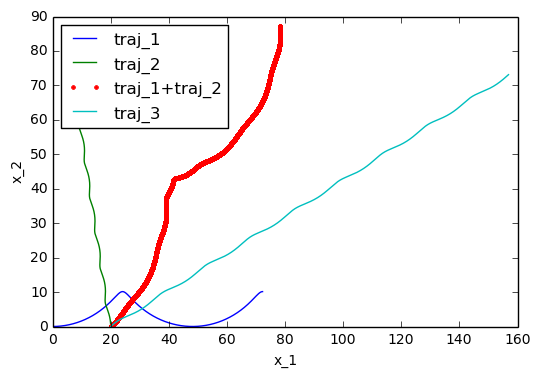

In [7]:
plt.plot(x_1[:,0], x_1[:,1], label='traj_1')
plt.plot(x_2[:,0], x_2[:,1], label='traj_2')
plt.plot(x_2[:,0]+x_1[:,0], x_2[:,1]+x_1[:,1], '.', label='traj_1+traj_2')
plt.plot(x_3[:,0], x_3[:,1],'-', label='traj_3')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(loc='upper left')
plt.show()

Note that the trajectory of the summed initial conditions does not coincide with the summed trajectories of the two initial conditions for the nonlinearized system.

c. Assess stability of the linear system (L):  for each eigenvalue of $A$, determine whether it corresponds to a stable, unstable, or neutral eigensystem, and discuss (with reference to the corresponding eigenvector) what directions in state space are governed by this eigensystem.

Recall the $A$ matrix for our $k$ value of 0.1

$$A = D_xf(x_0,u_0) = \begin{bmatrix}
0&0&1&0&0\\
0&0&0&1&0\\
0&0&-0.1&0&0\\
0&0&0&-0.1&0\\
0&0&0&0&0\\
\end{bmatrix}$$

Consider that the spectrum of $A$ is {0,-0.1}. Zero value eigenvalues correspond to a neutral eigensystem,
while eigenvalues of $\lambda = -0.1$ correspond to a stable eigensystem, with associated eigenvectors of

$$\begin{bmatrix}
-0.995\\0\\0.0995\\0\\0
\end{bmatrix}, 
\begin{bmatrix}
0\\-0.995\\0\\0.0995\\0
\end{bmatrix}
$$

thus this eigensystem governs the directions of position ($x_1, x_2$) and velocity ($v_1, v_2$) in our state space.

# Project linear system

This problem deals with your project system nonlinear DE (N)
$$\dot{x} = f(x,u)$$
with equilibrium
$$ f(x_0,u_0) = 0$$
and associated linear DE (L)
$$\dot{\xi} = A\xi + B\mu$$
obtained with $A = D_x f(x_0,u_0)$, $B = D_u f(x_0,u_0)$.

a. Simulate two "interesting" nonequilibrium trajectories for (L); you may wish to apply nonzero inputs.  Show that the trajectories sum linearly, i.e. with $\xi_1,\xi_2:[0,t]\rightarrow\mathbb{R}^n$ denoting the two trajectories generated by inputs $\mu_1,\mu_2:[0,t]\rightarrow\mathbb{R}^m$, provide a plot that convinces the reader that the trajectory $\xi_1 + \xi_2$ is the same as that obtained by simulating from initial condition $\xi_1(0) + \xi_2(0)$ with input $\mu_1 + \mu_2$.

b. Repeat (a.) using (N); this time, the trajectories will not sum linearly.  Use initial conditions $x_1(0) = x_0 + \xi_1(0)$, $x_2(0) = x_0 + \xi_2(0)$ and inputs $u_1 = u_0 + \mu_1$, $u_2 = u_0 + \mu_2$.  Provide the analogous plot from (a.) to convince the reader that the trajectories do not sum linearly.

c. Assess stability of the linear system (L):  for each eigenvalue of $A$, determine whether it corresponds to a stable, unstable, or neutral eigensystem, and discuss (with reference to the corresponding eigenvector) what directions in state space are governed by this eigensystem.